# Analysis : Effect of defendant advocate gender
---
### *Basic data exploration suggests some correlation between the gender of the advocate and the disposition. This is an analysis into this topic.*
---

## Preprocessing:

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
case_years = [
    "./precog_data/csv/cases/cases_2010.csv",
    "./precog_data/csv/cases/cases_2011.csv", 
    "./precog_data/csv/cases/cases_2012.csv", 
    "./precog_data/csv/cases/cases_2013.csv", 
    "./precog_data/csv/cases/cases_2014.csv", 
    "./precog_data/csv/cases/cases_2015.csv", 
    "./precog_data/csv/cases/cases_2016.csv", 
    "./precog_data/csv/cases/cases_2017.csv", 
    "./precog_data/csv/cases/cases_2018.csv", ]

In [6]:
disp_name_df = pd.read_csv("./precog_data/csv/keys/disp_name_key.csv")

----
### Used a set to find all the disposition types and cast into list to preserve order. Then the entire dataset was classifed based on dispositions vs gender for all years (computation time :: ~11 hours)

In [7]:
# Below lines were used to find out set

#disposition_types = set()

#for i in disp_name_df["disp_name_s"]:
#    disposition_types.add(i)
#disposition_types = list(disposition_types)
    

In [8]:
dispositions = ["reject", "bail order", "committed", "abated", "transferred", 
                "compounded", "probation", "cancelled", "died", "stayed",
                "absconded", "disposal in lok adalat", "disposed-otherwise", 
                "not press", "acquitted", "converted","p.o. consign", 
                "dismissed", "award", "plea bargaining", "plead guilty",
                "contest-allowed", "disposed", "ex-parte", "referred to lok adalat",
                "remanded", "other", "partly decreed", "prison", "allowed", 
                "appeal accepted", "procedural", "settled", "execution", 
                "bail granted", "convicted", "bail rejected", "quash",
                "uncontested","sine die", "withdrawn", "258 crpc", "closed",
                "disposition var missing", "otherwise", "compromise", "fine", 
                "bail refused","confession", "judgement","decided"]

In [1]:
arr_adv_vs_disp = []

In [ ]:
%%time
# code to see difference in ratio of the number of female advocates vs a certain disposition rate over years
for disposition in dispositions:
       
    male_total_cases_arr = [] # cases per year
    female_total_cases_arr = []

    male_target_cases_arr = []
    female_target_cases_arr = []

    for year in case_years:
        cases = pd.read_csv(year, chunksize=100000, iterator=True)
        
                    
        female_cases = 0 # target this year
        male_cases = 0 # total number of male advocates this year
        female_target_cases = 0 # target this year
        male_target_cases = 0 # total number of female advocate this year
            
        for case_df in cases:
    
            case_df = case_df[(case_df["female_adv_def"] == 0) | (case_df["female_adv_def"] == 1)]

            merged_case_df = pd.merge(
                left = case_df,
                right = disp_name_df,
                on = "disp_name",
                how="inner"
            )

            female_temp_cases = merged_case_df[merged_case_df["female_adv_def"] == 1].shape[0] # total cases with female advocate
            male_temp_cases = merged_case_df[merged_case_df["female_adv_def"] == 0].shape[0] # total cases with male advocate

            female_cases += female_temp_cases
            male_cases += male_temp_cases


            # total cases with female advocate and *target*
            filter_female = (merged_case_df["disp_name_s"] == disposition) & (merged_case_df["female_adv_def"] == 1)


            # total cases with male advocate and *target*
            filter_male = (merged_case_df["disp_name_s"] == disposition) & (merged_case_df["female_adv_def"] == 0)

            female_temp_cases_target = merged_case_df[filter_female].shape[0]
            female_target_cases += female_temp_cases_target

            male_temp_cases_target = merged_case_df[filter_male].shape[0]
            male_target_cases += male_temp_cases_target
            

        male_total_cases_arr.append(male_cases)
        female_total_cases_arr.append(female_cases)
        male_target_cases_arr.append(male_target_cases)
        female_target_cases_arr.append(female_target_cases)
        
        arr_adv_vs_disp.append((disposition, year[-8:-4], male_cases, male_target_cases, female_cases, female_target_cases))

---
### *Following cells were used to print and explore data, check bottommost cell for complete output*:

In [ ]:
df_adv = pd.DataFrame(arr_adv_vs_disp)

In [ ]:
def add_ratio(target, total):
    if total == 0:
        return 0
    else: return float(target) / float(total)

In [ ]:
for disposition in dispositions:
    temp = df[df[0] == disposition]
    print(f"For {disposition}: ")
    for i in range(0,9):
        print(f"    Men: {df_def.iloc[i][3] * 100/ df_adv.iloc[i][2]}    Women: {df.iloc[i][5] * 100/ df.iloc[i][4]}")

---
### After analysing the output shown below, the following outcomes had a very strong correlation with the gender of the defendant (see graph):

In [1]:
glob_x = ["2010","2011","2012","2013","2014","2015","2016","2017","2018"]

probation_female = [0.2147534825992520, 0.2452266433464509, 0.2388527141002388, 0.3408200921243014, 0.289329019700676, 0.4016445287792536, 0.1233928195039696, 0.1514264745501333,0.0949836219829384]
probation_male = [0.3910341782048548, 0.4693648587002542 , 0.5311414183159603 ,0.5906809075417743, 0.5154198384603718 , 0.5770045319926537, 0.27650720064224305, 0.25302453340542186, 0.18031047640599046 ]

appeal_accepted_female = [0.00857380824065454,0.01093135111499781,0.02576834260002577, 0.02190275178208753,0.01775428075435966,0.02108370229812355,0.02371249912175929, 0.02926339845600735, 0.02263628374359748]
appeal_accepted_male = [0.02575046286748299,0.03561558388404667,0.04733293065019198,0.03994255640734708,0.03130112651786262,0.03825490658938673,0.05816361014198203,0.05993912869201262,0.00383709089478008]


bail_rejected_female = [0.00081655316577662,0.00036437837049992,0.00099109010000099,0.00331859875486174,0.00361661274625844,0.00175697519151029,0.00922152743623972,0.05109482270096523,0.37860294182918924]
bail_rejected_male = [0.0015924117308699,0.0018037358320649 ,0.0065642061784781,  0.0805829212774360, 0.0734393269074594, 0.0847690782046366, 0.0572751316455415, 0.2973651952216489, 1.016697904522028]

execution_female = [ 0.2151339963745039, 0.3413788077539717, 0.3922714794001922, 0.3914831481555228, 0.4002288329519450, 0.4354346756623796, 0.1857479097871144, 0.1625744358667075,  0.1082990830085840 ]
execution_male = [ 0.1991291449797666, 0.2256637501898022, 0.2669836324609709, 0.3107759769667382, 0.2681301825683919, 0.3422014401256301, 0.0951623932437556, 0.0667129649050031, 0.0381413394070874]

Text(0.5, 1.0, 'Male vs Female Execution')

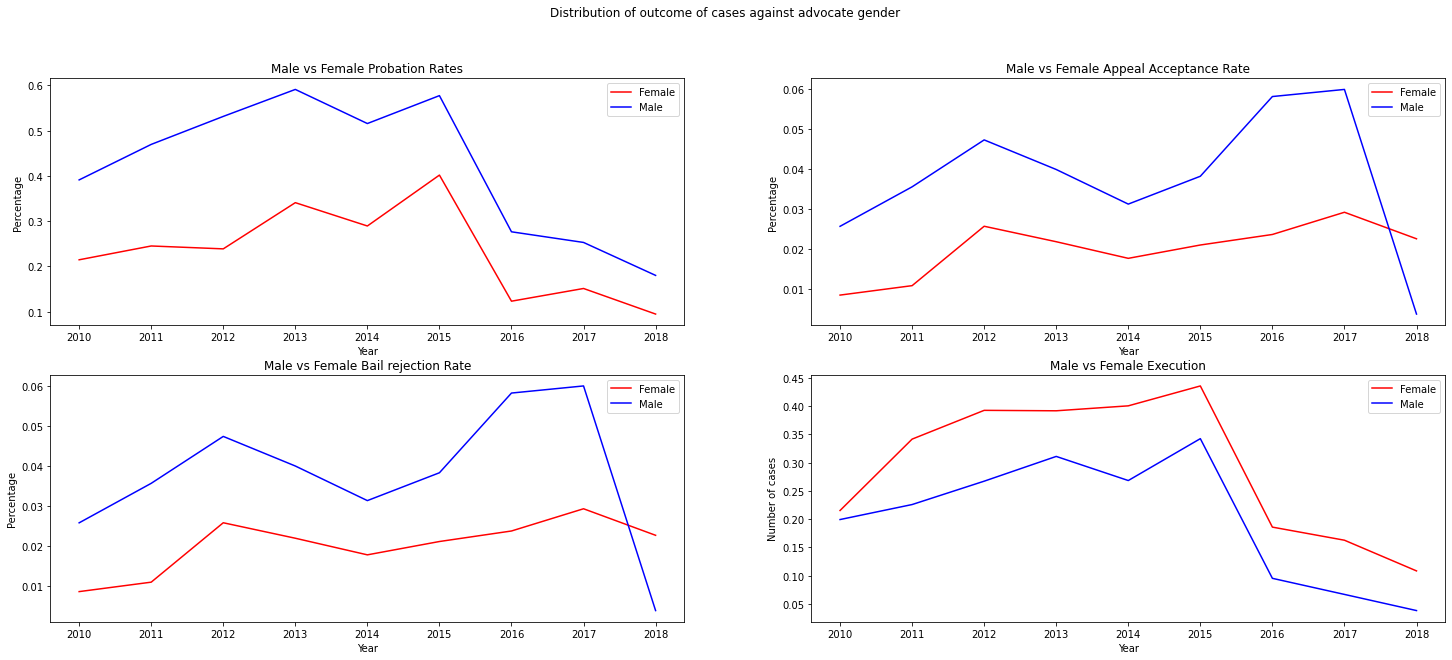

In [4]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(25)

fig.suptitle('Distribution of outcome of cases against advocate gender')

y0 = probation_female
y1 = probation_male

axs[0,0].plot(glob_x, y0, label ='Female', color="red")
axs[0,0].plot(glob_x, y1, label ='Male', color="blue")

axs[0,0].set_xlabel("Year")
axs[0,0].set_ylabel("Percentage")
axs[0,0].legend()
axs[0,0].set_title('Male vs Female Probation Rates')


y0 = appeal_accepted_female
y1 = appeal_accepted_male

axs[0,1].plot(glob_x, y0, label ='Female', color="red")
axs[0,1].plot(glob_x, y1, label ='Male', color="blue")

axs[0,1].set_xlabel("Year")
axs[0,1].set_ylabel("Percentage")
axs[0,1].legend()
axs[0,1].set_title('Male vs Female Appeal Acceptance Rate')

y0_conv = bail_rejected_female
y1_conv = bail_rejected_male


axs[1,0].plot(glob_x, y0, label ='Female', color="red")
axs[1,0].plot(glob_x, y1, label ='Male', color="blue")

axs[1,0].set_xlabel("Year")
axs[1,0].set_ylabel("Percentage")
axs[1,0].legend()
axs[1,0].set_title('Male vs Female Bail rejection Rate')


y0 = execution_female
y1 = execution_male

axs[1,1].plot(glob_x, y0, label ='Female', color="red")
axs[1,1].plot(glob_x, y1, label ='Male', color="blue")

axs[1,1].set_xlabel("Year")
axs[1,1].set_ylabel("Number of cases")
axs[1,1].legend()
axs[1,1].set_title('Male vs Female Execution')

### Insights :

> Defendants with male advocates are consistently around twice as likely to face probation

> Defendants with male advocates are  susally around two and half as likely to face have thier appeal accepted

> Defendants with male advocates are  upto five times as likely to face have thier bail rejected

> Defendants with female advocates are consistently around twice as likely to be executed

In [ ]:
# YEARWISE DATA FOR COMMAND FOR ADVOCATE GENDER VS DISPOSITION
'''
For reject:
    Men: 1.1667717270015936    Women: 0.9708817141084056
    Men: 1.4516793928428418    Women: 1.2093718116892582
    Men: 1.7270338147869488    Women: 1.4872958767348206
    Men: 1.8712152613502036    Women: 1.3685901265049845
    Men: 2.0574574665018788    Women: 1.4466450985033799
    Men: 2.5078309551672584    Women: 1.8539602220816642
    Men: 2.8424013669876294    Women: 2.762067027330851
    Men: 2.725878695508294    Women: 2.2328437520321804
    Men: 2.7371248382764577    Women: 2.610718058428243
For bail order:
    Men: 0.0034178593247941227    Women: 0.004899318994659742
    Men: 0.0060343162381810206    Women: 0.005830053927998834
    Men: 0.0011480001836800295    Women: 0.0023125435666689793
    Men: 0.0015630909565418846    Women: 0.005973477758751145
    Men: 0.0025546452054956603    Women: 0.010192272284910176
    Men: 0.0011440198177715944    Women: 0.003865345421322651
    Men: 0.0    Women: 0.0
    Men: 3.1072643178855685e-05    Women: 0.0
    Men: 6.559129734666804e-05    Women: 0.0004438487008548526
For committed:
    Men: 0.16638760622065932    Women: 0.14248852742802084
    Men: 0.24432421725243808    Women: 0.19384929310596122
    Men: 0.3207041538767672    Women: 0.28014813493361346
    Men: 0.47515173845022324    Women: 0.4397143350191815
    Men: 0.5670505626135472    Women: 0.52375128225361
    Men: 0.6316105510994589    Women: 0.5516902101342329
    Men: 0.3960075584134947    Women: 0.48830183376659875
    Men: 0.3612816222405551    Women: 0.36556023150599665
    Men: 0.35816127916148083    Women: 0.3519720197778981
For abated:
    Men: 0.6758040028570197    Women: 0.6442604477977562
    Men: 0.6536738655403485    Women: 0.7061652820288588
    Men: 0.5898954789986612    Women: 0.5778055283005779
    Men: 0.5192532332955121    Women: 0.4858428577117598
    Men: 0.44700912895741435    Women: 0.3688945001183619
    Men: 0.34940039410087576    Women: 0.2825216107948556
    Men: 0.26245020157355886    Women: 0.2726937399002319
    Men: 0.17897842471020875    Women: 0.19090883754633373
    Men: 0.0911063120145219    Women: 0.09853441158977727
For transferred:
    Men: 2.8736040666311675    Women: 2.8554864207208532
    Men: 2.891716490769628    Women: 2.8038915609969393
    Men: 2.627065958792092    Women: 2.3039541191356374
    Men: 2.2932498196165123    Women: 2.239390439780707
    Men: 2.091824167266336    Women: 1.9486967042794392
    Men: 2.2251743514105207    Women: 1.8146039777918337
    Men: 0.9926843315230583    Women: 0.7899775170378698
    Men: 0.6978604931539198    Women: 0.5592560593814739
    Men: 0.48403097876973683    Women: 0.49932978846170917
For compounded:
    Men: 0.8241701690014919    Women: 1.0390639034507536
    Men: 0.8962927325515614    Women: 1.0785599766797842
    Men: 0.8885521421683428    Women: 1.1651915942344986
    Men: 0.7937431701996709    Women: 1.0745622768242338
    Men: 0.8103065681810604    Women: 1.1668507851337488
    Men: 0.7048836252816102    Women: 1.0018272541991706
    Men: 0.6029278539595203    Women: 0.6665846975339
    Men: 0.6239386750314222    Women: 0.5652945384279516
    Men: 0.6443689051336668    Women: 0.5699017318976307
For probation:
    Men: 0.3910341782048548    Women: 0.21475348259925203
    Men: 0.4693648587002542    Women: 0.24522664334645095
    Men: 0.5311414183159603    Women: 0.23885271410023887
    Men: 0.5906809075417743    Women: 0.3408200921243014
    Men: 0.5154198384603718    Women: 0.289329019700676
    Men: 0.5770045319926537    Women: 0.40164452877925366
    Men: 0.27650720064224305    Women: 0.12339281950396964
    Men: 0.25302453340542186    Women: 0.1514264745501333
    Men: 0.18031047640599046    Women: 0.09498362198293846
For cancelled:
    Men: 0.27983723221751877    Women: 0.43889732660493525
    Men: 0.24183178228449373    Women: 0.4168488558519166
    Men: 0.1998109037646164    Women: 0.30558611416697223
    Men: 0.16900920967609126    Women: 0.1811954920154514
    Men: 0.10256228225010998    Women: 0.24001157316078803
    Men: 0.06908763582445043    Women: 0.17077798861480076
    Men: 0.10985401980989733    Women: 0.0065868053115998035
    Men: 0.17947558700107044    Women: 0.017650938751242535
    Men: 0.44487297425377603    Women: 0.18375336215390897
For died:
    Men: 4.395600127548295    Women: 4.717635915274443
    Men: 4.135605515758584    Women: 4.540154496429092
    Men: 3.8177187646811563    Women: 4.032745616904033
    Men: 3.2955818954989957    Women: 3.25156306001354
    Men: 2.950211847315041    Women: 2.7095005129014442
    Men: 2.5555170495226647    Women: 2.4555485276547895
    Men: 0.5153809906852549    Women: 0.33987915407854985
    Men: 0.546257067084283    Women: 0.40782958483134063
    Men: 0.6142952953002195    Women: 1.1673220832482623
For stayed:
    Men: 1.4393460081539249    Women: 1.4293763166919797
    Men: 1.4494821146474173    Women: 1.4075936452412185
    Men: 1.3162263644423722    Women: 1.1516466962011516
    Men: 1.1480623952415046    Women: 1.122350098894243
    Men: 1.0464095671731857    Women: 0.9738551776743207
    Men: 1.1129359622350687    Women: 0.9083561740108229
    Men: 0.046454732813890724    Women: 0.08475022834258414
    Men: 0.003666571895104971    Women: 0.0046449838819059295
    Men: 0.0018037606770333712    Women: 0.0026630922051291157
For absconded:
    Men: 0.27661356944526977    Women: 0.5817941306158444
    Men: 0.26751042149370974    Women: 0.4569304766069086
    Men: 0.27278250518366237    Women: 0.46779452720046777
    Men: 0.22466641266438622    Women: 0.40619648759507787
    Men: 0.1435172785445299    Women: 0.25842341986901285
    Men: 0.10898881483453288    Women: 0.15601939700611428
    Men: 0.07015806984392924    Women: 0.0737722194899178
    Men: 0.02535527683394624    Women: 0.02786990329143558
    Men: 0.0071822470594601505    Women: 0.009320822717951904
For disposal in lok adalat:
    Men: 1.6575452545936225    Women: 1.369359659007398
    Men: 1.8421062124925431    Women: 1.625856289170675
    Men: 1.8771274798275763    Women: 1.9385722356019386
    Men: 1.8438611696107206    Women: 1.9666016221310714
    Men: 1.811673706731033    Women: 1.8175122964833372
    Men: 1.8592833301803031    Women: 1.8912080961416824
    Men: 4.102359069064924    Women: 4.044298461322279
    Men: 3.577486627111192    Women: 2.9425972891874066
    Men: 2.6881609348071698    Women: 1.948051948051948
For disposed-otherwise:
    Men: 6.985444191600533    Women: 6.091486616693613
    Men: 6.387389328508504    Women: 5.725841714035854
    Men: 6.617720648578893    Women: 6.385593514306386
    Men: 7.3720951978217215    Women: 7.728352780322036
    Men: 8.482497722332116    Women: 9.5064309950288
    Men: 10.033695569071732    Women: 11.17576779815869
    Men: 3.4302250865076607    Women: 2.497277453804539
    Men: 3.4124908918314683    Women: 3.1790269687764185
    Men: 3.130016709382999    Women: 3.977772057061189
For not press:
    Men: 1.7401953073568257    Women: 2.5190665164208843
    Men: 1.6507134431119757    Women: 2.124325900014575
    Men: 1.483863827161802    Women: 1.8127037929018126
    Men: 1.1739371330399746    Women: 1.2620631064739225
    Men: 1.1393986526532276    Women: 1.2753491675215025
    Men: 1.032519739922441    Women: 1.240424485206269
    Men: 3.495496524621167    Women: 3.500667462938242
    Men: 2.646892036547643    Women: 2.244920710125136
    Men: 1.8492810373919588    Women: 1.300476693504718
For acquitted:
    Men: 16.307966214460574    Women: 14.317034932144432
    Men: 16.593713751058875    Women: 15.157411456055968
    Men: 16.347875846429368    Women: 15.194402323115195
    Men: 15.604727791896769    Women: 14.765441440006372
    Men: 14.545181724014418    Women: 14.210329046003315
    Men: 12.430082252234605    Women: 12.517394054395952
    Men: 10.582826027977553    Women: 10.837929459706316
    Men: 7.757596096033111    Women: 8.223014966138068
    Men: 4.500514071792955    Women: 4.347498024873281
For converted:
    Men: 0.9134229045512292    Women: 0.9292375026537978
    Men: 0.9856924394280911    Women: 1.1124471651362775
    Men: 1.019512470814303    Women: 1.1440483387678106
    Men: 1.0630134998025202    Women: 1.3798733622715145
    Men: 1.0097302402227004    Women: 1.4042320944790763
    Men: 0.9756535841024774    Women: 1.2597512123128822
    Men: 0.02218023103614045    Women: 0.02371249912175929
    Men: 0.01808427833009401    Women: 0.020902427468576686
    Men: 0.02325211490939382    Women: 0.02041704023932322
For p.o. consign:
    Men: 0.06680361407552149    Women: 0.06818218934234808
    Men: 0.06545921310548543    Women: 0.060486809502987904
    Men: 0.055633855055262964    Women: 0.04889377826671556
    Men: 0.04237092985768894    Women: 0.039159465307368614
    Men: 0.03740538400888909    Women: 0.027617770062337253
    Men: 0.03127917599321847    Women: 0.02986857825567503
    Men: 0.1610367274798466    Women: 0.2419553151127661
    Men: 0.10474588015592252    Women: 0.1853348568880466
    Men: 0.0301719967794673    Women: 0.069240397333357
For dismissed:
    Men: 8.800249814445195    Women: 9.591233485212221
    Men: 8.303153553343192    Women: 9.292377204489142
    Men: 7.667081124168877    Women: 8.30467431127497
    Men: 6.681432293738285    Women: 6.8369771547661715
    Men: 6.033695501350466    Women: 5.8280070491070255
    Men: 5.237127405301667    Women: 5.300091362709958
    Men: 2.001139156357936    Women: 1.8851436801798638
    Men: 1.7519688403534202    Women: 1.4329775275679792
    Men: 1.3314377448400145    Women: 0.9573816477439171
For award:
    Men: 0.7325482355107039    Women: 0.9051491842633874
    Men: 0.8234873953300296    Women: 1.1532575426322693
    Men: 0.6310468701982684    Women: 1.0505555060010505
    Men: 0.5243611912427829    Women: 0.8980128230655888
    Men: 0.4558831596712414    Women: 0.847273731555275
    Men: 0.36815115794337605    Women: 0.433270082226439
    Men: 0.2832977148650385    Women: 0.28323262839879154
    Men: 0.1734785668675513    Women: 0.10451213734288342
    Men: 0.07802084819386164    Women: 0.09320822717951904
For plea bargaining:
    Men: 0.13636481919718368    Women: 0.17760031355641565
    Men: 0.1476439766537552    Women: 0.18510421221396298
    Men: 0.22633265159783963    Women: 0.2467814349002468
    Men: 0.3478435625075887    Women: 0.44535595290244645
    Men: 0.430148470601143    Women: 0.4520765932823062
    Men: 0.3811539197746337    Women: 0.3608827043362148
    Men: 0.06431949686732001    Women: 0.1541312442914354
    Men: 0.16785441845217844    Women: 0.16721941974861348
    Men: 0.4092241041458619    Women: 0.8748257893849145
For plead guilty:
    Men: 0.23167648718632888    Women: 0.3262129897277612
    Men: 0.2484564120677142    Women: 0.30935723655443814
    Men: 0.4028597567652534    Women: 0.4552407192671219
    Men: 0.6448308442505467    Women: 0.8488975614936349
    Men: 0.7915904306755343    Women: 0.8403692890396907
    Men: 0.6598762114751326    Women: 0.6363764143650291
    Men: 0.4356717770045899    Women: 0.5458266001545704
    Men: 0.6109503101826605    Women: 0.9721951264829111
    Men: 1.0980967045292431    Women: 2.0425917213340314
For contest-allowed:
    Men: 0.01367143729917649    Women: 0.02245521205885715
    Men: 0.01331484996033421    Women: 0.029514648010494096
    Men: 0.014600207464238322    Women: 0.02114325546668781
    Men: 0.014765627071618874    Women: 0.032522267797645124
    Men: 0.012907681038293864    Women: 0.017754280754359662
    Men: 0.016853365120342512    Women: 0.020380912221519432
    Men: 0.21269540577288903    Women: 0.12251457879575633
    Men: 0.10664131138983272    Women: 0.09011268730897504
    Men: 0.11573584416819577    Women: 0.07057194343592156
For disposed:
    Men: 4.441391674638435    Women: 3.206196005421913
    Men: 4.404952468281305    Women: 3.1529660399358694
    Men: 4.307738227699655    Women: 3.661086829403661
    Men: 3.9210974015008464    Women: 3.2014522188151275
    Men: 3.587205906554843    Women: 2.590481075251848
    Men: 3.610442836119998    Women: 2.68430669758943
    Men: 1.7270752715809048    Women: 1.539995081852034
    Men: 1.6203761964909664    Women: 1.3897791774662542
    Men: 1.2408889588529395    Women: 0.9959964847182893
For ex-parte:
    Men: 0.23466711409552374    Women: 0.2951839694282495
    Men: 0.20490439052258164    Women: 0.28895204780644224
    Men: 0.1906563381973218    Women: 0.2553708824335887
    Men: 0.1490239753031629    Women: 0.2362842313461564
    Men: 0.12450534001520955    Women: 0.264670296430732
    Men: 0.11409504963092805    Women: 0.21645934359406846
    Men: 23.315325778092976    Women: 27.376080236071104
    Men: 26.76703130413437    Women: 31.500887191921443
    Men: 29.508901558941158    Women: 33.703207250712374
For referred to lok adalat:
    Men: 2.562151635659303    Women: 3.004099096892199
    Men: 2.7298393986410328    Women: 2.8625564786474276
    Men: 2.7710663920885716    Women: 2.9699666663363034
    Men: 2.8195927868934825    Women: 3.0395045995778744
    Men: 2.8230711890878464    Women: 3.1461243062679185
    Men: 2.7064997625461307    Women: 2.9299318293625696
    Men: 0.8190185168438071    Women: 1.1316131525328461
    Men: 0.7175294762861355    Women: 0.8885854166086044
    Men: 0.45021866498752944    Women: 1.0097557944447897
For remanded:
    Men: 0.1719804669339588    Women: 0.20046380219816112
    Men: 0.17220757916678556    Women: 0.20733129281445853
    Men: 0.17967674669699743    Women: 0.19095002593352428
    Men: 0.15812339765731742    Women: 0.16427063836565647
    Men: 0.15620983156551885    Women: 0.19299560745942818
    Men: 0.1544147724767806    Women: 0.19572703633424696
    Men: 2.7387032339030704    Women: 1.1829902339633247
    Men: 2.8618525820589666    Women: 1.0209674572429233
    Men: 3.718403442231285    Women: 1.2241347169576835
For other:
    Men: 3.6301161567259395    Women: 5.273300344585436
    Men: 3.4120122903280077    Women: 4.535053199242093
    Men: 2.9648135000111857    Women: 3.8275899662038277
    Men: 2.2971017223308476    Women: 2.748131628901013
    Men: 2.154614657317203    Women: 2.632565296299219
    Men: 1.977675429858471    Women: 2.5100147585916086
    Men: 0.9716464299823415    Women: 1.187820557858498
    Men: 0.7983804938375181    Women: 1.0873907267541782
    Men: 0.5361432645116646    Women: 0.541939263743775
For partly decreed:
    Men: 0.12618891984381936    Women: 0.1306485065242598
    Men: 0.12153899988423296    Women: 0.12789680804547443
    Men: 0.10429140130200883    Women: 0.10241264366676908
    Men: 0.08105743103210059    Women: 0.08263310899605751
    Men: 0.07534858806104042    Women: 0.06378389752492175
    Men: 0.06822264523052557    Women: 0.062196921779464474
    Men: 0.020720587791988144    Women: 0.067185414178318
    Men: 0.008513904231006458    Women: 0.007431974211049488
    Men: 0.001279030298260027    Women: 0.0013315461025645578
For prison:
    Men: 0.18642869044331578    Women: 0.09390361406431173
    Men: 0.22399119514552376    Women: 0.11113540300247778
    Men: 0.2515886556388003    Women: 0.10703773080010703
    Men: 0.27903964808123605    Women: 0.1559741414785021
    Men: 0.24285264053506642    Women: 0.12493753123438281
    Men: 0.27219300786248546    Women: 0.13142174432497014
    Men: 0.7260455884662799    Women: 0.9651865383264245
    Men: 0.6041143286833123    Women: 1.3149949369675686
    Men: 0.5687421392929586    Women: 0.5965326539489219
For allowed:
    Men: 6.538403727641666    Women: 8.576257900151878
    Men: 7.662073043430351    Women: 8.545037166593792
    Men: 8.600552453011469    Women: 9.106135838809106
    Men: 9.80635815158912    Women: 8.804906216399187
    Men: 10.955071589225959    Women: 7.889805097451275
    Men: 12.174100842277616    Women: 9.192494201981868
    Men: 12.114785075465143    Women: 7.528718471158575
    Men: 13.538972085891    Women: 8.681474875282182
    Men: 16.14549461577438    Women: 8.573825354413188
For appeal accepted:
    Men: 0.02575046286748299    Women: 0.008573808240654549
    Men: 0.035615583884046675    Women: 0.010931351114997814
    Men: 0.04733293065019198    Women: 0.02576834260002577
    Men: 0.039942556407347084    Women: 0.02190275178208753
    Men: 0.03130112651786262    Women: 0.017754280754359662
    Men: 0.03825490658938673    Women: 0.02108370229812355
    Men: 0.058163610141982035    Women: 0.02371249912175929
    Men: 0.05993912869201262    Women: 0.029263398456007356
    Men: 0.003837090894780081    Women: 0.022636283743597482
For procedural:
    Men: 0.057016107827247406    Women: 0.06083321085035847
    Men: 0.07037849264748082    Women: 0.06631686343098674
    Men: 0.08368626980005958    Women: 0.06541194660006541
    Men: 0.10165673685224184    Women: 0.07931451024119576
    Men: 0.10406817837124427    Women: 0.10192272284910177
    Men: 0.13156227904373335    Women: 0.31766111462506147
    Men: 0.5656434884838908    Women: 0.3060668868123375
    Men: 0.5829227860353327    Women: 0.5132707189506053
    Men: 0.37259136457774783    Women: 0.41810547620527116
For settled:
    Men: 0.2827501805056956    Women: 0.35030130811817156
    Men: 0.2807924762570973    Women: 0.3563620463489287
    Men: 0.2786696856127907    Women: 0.3188006488336521
    Men: 0.23798059813350192    Women: 0.2717932380231771
    Men: 0.24871487900662487    Women: 0.3389752492174965
    Men: 0.24565732867466142    Women: 0.36545083983414156
    Men: 0.15357985438472072    Women: 0.16686573456052836
    Men: 0.14911761461532844    Women: 0.19369582787547726
    Men: 0.1130793966256557    Women: 0.19218648747015118
For execution:
    Men: 0.19912914497976666    Women: 0.21513399637450394
    Men: 0.2256637501898022    Women: 0.3413788077539717
    Men: 0.26698363246097095    Women: 0.39227147940019226
    Men: 0.31077597696673825    Women: 0.3914831481555228
    Men: 0.2681301825683919    Women: 0.40022883295194507
    Men: 0.34220144012563014    Women: 0.43543467566237966
    Men: 0.09516239324375567    Women: 0.18574790978711445
    Men: 0.06671296490500316    Women: 0.16257443586670756
    Men: 0.038141339407087464    Women: 0.10829908300858404
For bail granted:
    Men: 0.06035628853102348    Women: 0.0
    Men: 0.05421046055278928    Women: 0.0010931351114997813
    Men: 0.011656617249674145    Women: 0.005946540600005946
    Men: 0.14570240702051138    Women: 0.003982318505834096
    Men: 0.18764541309419702    Women: 0.002959046792393277
    Men: 0.17880192664098482    Women: 0.007379295804343242
    Men: 0.26806665492605797    Women: 0.010538888498559685
    Men: 0.9326453850133535    Women: 0.1337755357988908
    Men: 2.6832087918574965    Women: 0.8814835198977372
For convicted:
    Men: 1.9295757853988273    Women: 1.9176751098264009
    Men: 2.1314254399557657    Women: 2.345503570908031
    Men: 2.2552610787904905    Women: 2.453608724235787
    Men: 2.281638286796487    Women: 2.872247222332842
    Men: 2.2139362080890286    Women: 2.9291275414924116
    Men: 2.1578445996963045    Women: 2.7155808559983132
    Men: 0.6968844549581067    Women: 0.7539696480011241
    Men: 0.5431808754095763    Women: 0.6247503321163476
    Men: 0.42614665886130226    Women: 0.9742478983764015
For bail rejected:
    Men: 0.0015924117308699888    Women: 0.0008165531657766237
    Men: 0.001803735832064979    Women: 0.0003643783704999271
    Men: 0.006564206178478116    Women: 0.000991090100000991
    Men: 0.08058292127743609    Women: 0.003318598754861747
    Men: 0.07343932690745945    Women: 0.0036166127462584495
    Men: 0.08476907820463668    Women: 0.001756975191510296
    Men: 0.0572751316455415    Women: 0.009221527436239725
    Men: 0.29736519522164895    Women: 0.05109482270096523
    Men: 1.016697904522028    Women: 0.37860294182918924
For quash:
    Men: 1.0138225222170565    Women: 1.2705567259484265
    Men: 1.0264896644297063    Women: 1.144876840110771
    Men: 0.9773308230395984    Women: 1.1281908971677947
    Men: 0.969758376841691    Women: 1.1930362523727982
    Men: 0.9408086016786439    Women: 1.2299771167048055
    Men: 0.7978282597449561    Women: 1.0348583877995643
    Men: 0.1409190358104431    Women: 0.2665460549427387
    Men: 0.20175467216030998    Women: 0.4514924333212564
    Men: 0.029975222887427298    Women: 0.4598272540856273
For uncontested:
    Men: 0.037868327746298516    Women: 0.024904871556187022
    Men: 0.041485924137494516    Women: 0.031700918233493657
    Men: 0.047097443433026846    Women: 0.027089796066693757
    Men: 0.027214530046934596    Women: 0.03517714680153452
    Men: 0.015973255284888657    Women: 0.013808885031168627
    Men: 0.014370005028106614    Women: 0.01686696183849884
    Men: 1.9850196179225152    Women: 1.5795159137216328
    Men: 1.3950684608010837    Women: 1.1189766171511384
    Men: 0.9677340010527403    Women: 0.9986595769234183
For sine die:
    Men: 0.03522725463168488    Women: 0.024904871556187022
    Men: 0.033418305688622064    Women: 0.024413350823495116
    Men: 0.02366646532509599    Women: 0.01750925843335084
    Men: 0.029447517127708718    Women: 0.022234611657573705
    Men: 0.023690972905701862    Women: 0.037481259370314844
    Men: 0.047100132985328086    Women: 0.07238737789022419
    Men: 0.23395542693771607    Women: 0.323192580622497
    Men: 0.2220761807992816    Women: 0.3376903282145611
    Men: 0.17280027285979696    Women: 0.3324426769402846
For withdrawn:
    Men: 2.0298200458226185    Women: 1.5547172276386916
    Men: 2.0855121642304755    Women: 1.6892581256376622
    Men: 2.008293859788556    Women: 1.55336855006822
    Men: 2.045751114051211    Women: 1.5245642679834865
    Men: 1.986115637763142    Women: 1.4413845708724584
    Men: 1.8423741592151912    Women: 1.3388150959308454
    Men: 0.8187963972196969    Women: 0.6182814585821682
    Men: 0.660355812837041    Women: 0.5234896834907983
    Men: 0.4780293750625167    Women: 0.31513257760694535
For 258 crpc:
    Men: 0.4413699246245501    Women: 0.3894958600754495
    Men: 0.5571576009263988    Women: 0.43616090948841274
    Men: 0.6827951861703067    Women: 0.49158068960049156
    Men: 0.9408691064841758    Women: 0.7506670383497273
    Men: 1.1483802473757072    Women: 1.0603251006075909
    Men: 0.9632367836412978    Women: 1.1922833649588869
    Men: 0.7119568580227228    Women: 1.268618703014122
    Men: 0.5364691844829435    Women: 0.7970792341350575
    Men: 0.07241279227072152    Women: 0.1105183265128583
For closed:
    Men: 0.6299736164563712    Women: 0.9410775235575588
    Men: 0.5922484616592992    Women: 0.9229704124763154
    Men: 0.540619778806857    Women: 0.7406746680674073
    Men: 0.5653923288520074    Women: 0.5744494444665684
    Men: 0.4783371464774401    Women: 0.732857255582735
    Men: 0.44337743669245455    Women: 0.6100217864923747
    Men: 0.0539433372838895    Women: 0.08299374692615752
    Men: 0.03315451027183902    Women: 0.048772330760012264
    Men: 0.021022010799607107    Women: 0.04349717268377556
For disposition var missing:
    Men: 8.108210979795402    Women: 7.311825322946777
    Men: 8.250943599804147    Women: 7.89826555895642
    Men: 9.423344789786448    Women: 9.512482779809513
    Men: 11.602991644441467    Women: 12.735454581657441
    Men: 14.264869917466136    Women: 16.337226123780216
    Men: 17.723238725684695    Women: 20.268465809262775
    Men: 12.723837084775127    Women: 14.949413335206913
    Men: 14.47770770896741    Women: 17.211058777626043
    Men: 16.332954543591157    Women: 21.147615200930307
For otherwise:
    Men: 0.42793152318842775    Women: 0.6173141933271276
    Men: 0.4603461795399293    Women: 0.7644658213088471
    Men: 0.5115959792912541    Women: 0.7545499294674212
    Men: 0.426165584365741    Women: 0.7178129106765959
    Men: 0.3318887486971309    Women: 0.5970698861095768
    Men: 0.3033047663213959    Women: 0.4258907864220957
    Men: 1.7046411895457811    Women: 2.315481627204384
    Men: 1.3612614250224888    Women: 2.0605148500134702
    Men: 0.7494133678343557    Women: 0.9551624042396428
For compromise:
    Men: 1.6462430152354963    Women: 2.0781278069015072
    Men: 1.7950451048741205    Women: 2.1520186561725696
    Men: 1.7947952615262162    Women: 2.328731371635662
    Men: 1.6176037536512828    Women: 2.1544343116562463
    Men: 1.6557865671914715    Women: 2.355730029721981
    Men: 1.4556117520412384    Women: 2.0096282240494765
    Men: 0.5969306241085467    Women: 0.646385161244994
    Men: 0.4237687076732339    Women: 0.4826138253300261
    Men: 0.23006147544343816    Women: 0.2254751400342651
For fine:
    Men: 4.818055307954951    Women: 4.198308101840511
    Men: 4.308173842091783    Women: 3.8667832677452267
    Men: 4.109899529378796    Women: 3.657122469003657
    Men: 3.9771732895667866    Women: 3.6083124261611776
    Men: 3.2657508666969997    Women: 3.0405849706725583
    Men: 2.662413145178347    Women: 2.2165999016093894
    Men: 0.402861535386036    Women: 0.3605178107215626
    Men: 0.5534348476585986    Women: 0.596880428824912
    Men: 0.13114979904466276    Women: 0.2481114237778626
For bail refused:
    Men: 0.006874557960097269    Women: 0.009798637989319485
    Men: 0.012101427673308678    Women: 0.011660107855997668
    Men: 0.003914974985370356    Women: 0.004625087133337959
    Men: 0.04295708896639215    Women: 0.013606254894933164
    Men: 0.0411701243117248    Women: 0.021699676477550698
    Men: 0.04400290860062938    Women: 0.00843348091924942
    Men: 0.0014596432441523043    Women: 0.0030738424787465747
    Men: 0.10421764522188198    Women: 0.021366925856767277
    Men: 0.3973192836774417    Women: 0.1451385251795368
For confession:
    Men: 0.11177953564497142    Women: 0.08573808240654548
    Men: 0.11632456356971783    Women: 0.1020259437399796
    Men: 0.1380249451609143    Women: 0.111662817933445
    Men: 0.17140967078792343    Women: 0.15165996309718185
    Men: 0.15696277962608599    Women: 0.13414345458849522
    Men: 0.18371284098068727    Women: 0.11771733783118983
    Men: 1.2245137563442918    Women: 1.2743272676175086
    Men: 0.8041910781119641    Women: 0.9178488150646117
    Men: 0.47101110624642323    Women: 0.43497172683775553
For untrace:
    Men: 1.0793055997352712    Women: 0.8075710809530808
    Men: 1.1153646481550898    Women: 0.8890832240198222
    Men: 1.0869206867278227    Women: 0.8123635186341457
    Men: 1.0678144220261845    Women: 0.8060876375559184
    Men: 1.0173672848370243    Women: 0.7443646597753755
    Men: 0.9455742337717998    Women: 0.700330311336004
    Men: 0.008504008465930817    Women: 0.010538888498559685
    Men: 0.004474460617755219    Women: 0.005573980658287116
    Men: 0.003935477840800083    Women: 0.013315461025645578
For judgement:
    Men: 8.857576636756514    Women: 7.957310600493198
    Men: 7.746061542810686    Women: 7.194650925521061
    Men: 7.221333257977424    Women: 6.601981519473268
    Men: 6.778232283689844    Women: 6.484210107124368
    Men: 5.533119496084132    Women: 5.336805281569742
    Men: 4.016681483118453    Women: 3.5367910605102257
    Men: 2.512934501682556    Women: 2.4472177334363803
    Men: 2.394022866358115    Women: 2.290441552167814
    Men: 1.1435186779418107    Women: 1.1260441540687611
For decided:
    Men: 0.2299675575239318    Women: 0.13840576159913773
    Men: 0.3592713825503972    Women: 0.2783850750619443
    Men: 0.4740946399577065    Women: 0.3587746162003588
    Men: 0.3321289159266408    Women: 0.23163819308934996
    Men: 0.4092272709182417    Women: 0.2534916752150241
    Men: 0.43118385961035244    Women: 0.397779183357931
    Men: 1.6455573695324859    Women: 1.6734876695004566
    Men: 1.3554508407480428    Women: 1.4501639679310312
    Men: 1.1576536025200177    Women: 2.5308252922743697
'''


In [ ]:
[]